## Задача 1

+ Постройте график
+ Назовите график
+ Сделайте именование оси x и оси y
+ Сделайте выводы

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('kc_house_data_new.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

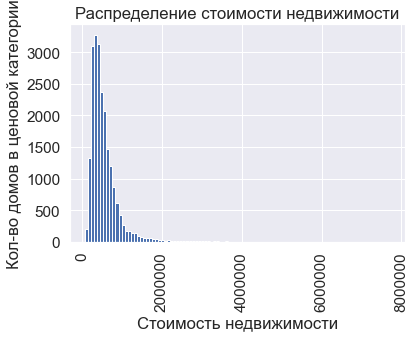

In [141]:
plt.ticklabel_format(style='plain')
plt.hist(df['price'],bins=100)

plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость недвижимости')
plt.ylabel('Кол-во домов в ценовой категории')
plt.xticks(rotation=90);

#не смогла увеличить масштаб оси x, для более детального изучения распределения стоимости
# Вывод: стоимость недвижимости в основном варьируется в ценовом диапазоне до 1 млн.

### 1.3 Изучите распределение квадратуры жилой

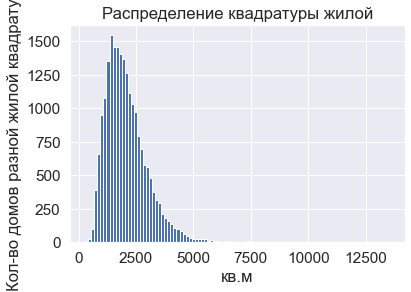

In [142]:
plt.hist(df['sqft_living'],bins=100)

plt.title('Распределение квадратуры жилой')
plt.xlabel('кв.м')
plt.ylabel('Кол-во домов разной жилой квадратуры');

# Вывод: жилая квадратура в основном варьируется в диапазоне от 1 тысячи кв.м до 4 тысяч.кв.м.

### 1.4 Изучите распределение года постройки

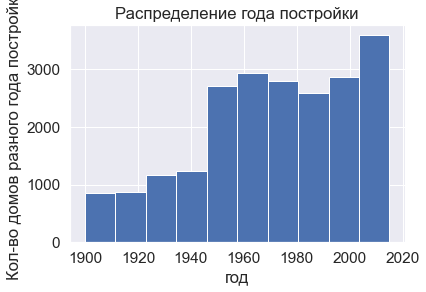

In [143]:
plt.hist(df['yr_built'])

plt.title('Распределение года постройки')
plt.xlabel('год')
plt.ylabel('Кол-во домов разного года постройки');

# Вывод: большинство домов были построены с 1950 до 2015-2016 годов

In [55]:
data = df['yr_built'].value_counts().reset_index()
data.head()

,index,yr_built
0,2014,559
1,2006,454
2,2005,450
3,2004,433
4,2003,422


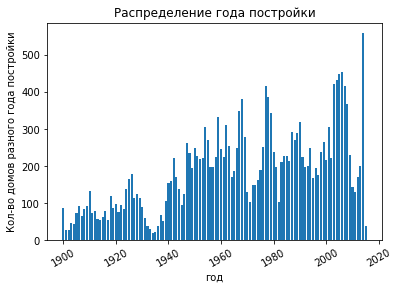

In [57]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['yr_built'])

plt.title('Распределение года постройки')
plt.xlabel('год')
plt.ylabel('Кол-во домов разного года постройки');
plt.xticks(rotation=30);

## Задача 2

+ Постройте график
+ Сделайте выводы

### 2.1 Изучите распределение домов от наличия вида на набережную

In [62]:
# Готовим данные для графика
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data.head()

no     21450
yes      163
Name: waterfront, dtype: int64

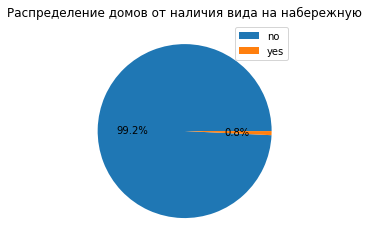

In [63]:
# Строим круговую диаграмму

plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

# Большинство домов без вида на набережную

### 2.2 Изучите распределение этажей домов

In [66]:
# Готовим данные для графика
data = df['floors'].value_counts()
names = data.index
values = data.values

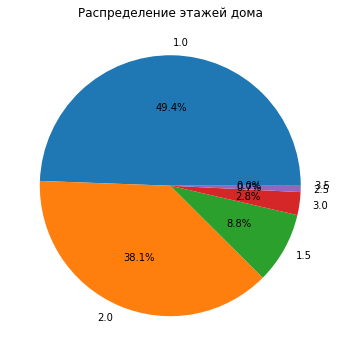

In [74]:
# Строим круговую диаграмму

plt.figure(figsize=(15, 6))

plt.pie(values, autopct='%1.1f%%',labels=names)

plt.title('Распределение этажей дома');

# Больше всего одноэтажных домов, когда 2.5 и 3.5 этажных домов практически нет

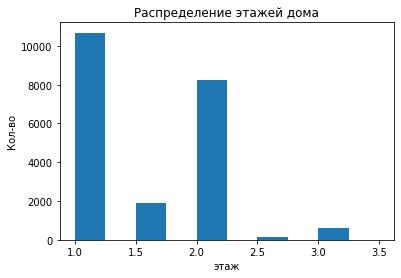

In [76]:
plt.figure(figsize = (6,4))

plt.hist(df['floors'])

plt.title('Распределение этажей дома')
plt.xlabel('этаж')
plt.ylabel('Кол-во');

### 2.3 Изучите распределение состояния домов

In [78]:
# Готовим данные для графика
data = df['condition'].value_counts()
names = data.index
values = data.values

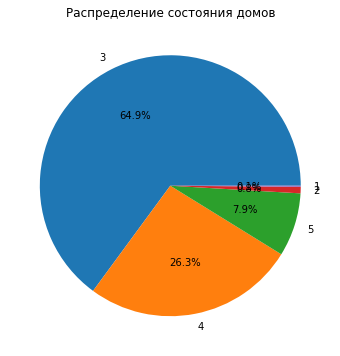

In [81]:
# Строим круговую диаграмму

plt.figure(figsize=(15, 6))

plt.pie(values, autopct='%1.1f%%',labels=names)

plt.title('Распределение состояния домов');

# Больше всего домов в среднем состоянии, когда домов в плохом состоянии наименьшее кол-во

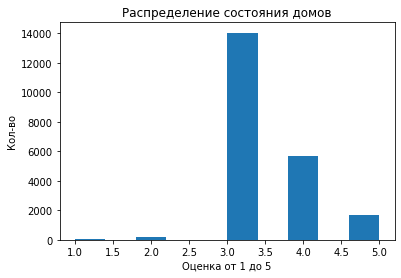

In [82]:
plt.figure(figsize = (6,4))

plt.hist(df['condition'])

plt.title('Распределение состояния домов')
plt.xlabel('Оценка от 1 до 5')
plt.ylabel('Кол-во');

## Задача 3

+ Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
+ Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

### Взаимосвязь стоимости недвижимости и различных факторов

In [146]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


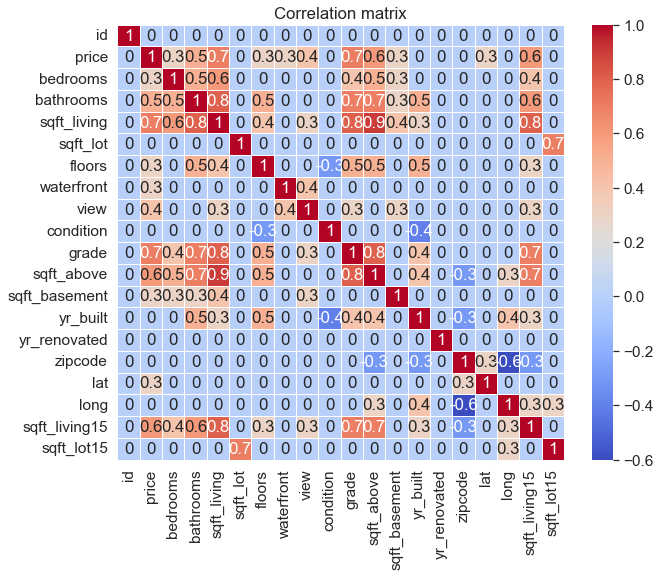

In [147]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix');

### Взаимосвязь стоимости недвижимости и кол-ва ванных комнат

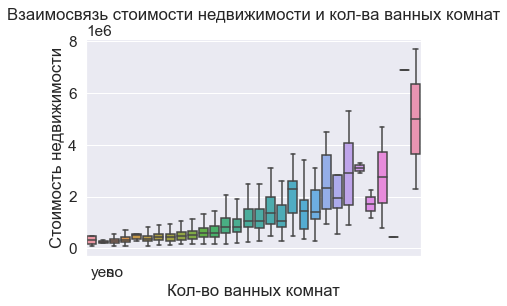

In [165]:
plt.figure(figsize=(6, 4))

sns.boxplot(x=df['bathrooms'],y=df['price'], showfliers=False)

plt.title('Взаимосвязь стоимости недвижимости и кол-ва ванных комнат')
plt.xlabel('Кол-во ванных комнат')
plt.ylabel('Стоимость недвижимости')
plt.xticks([1, 2], ['yes', 'no']);

### Проверим взаимосвязь стоимости недвижимости и размером жилой площади

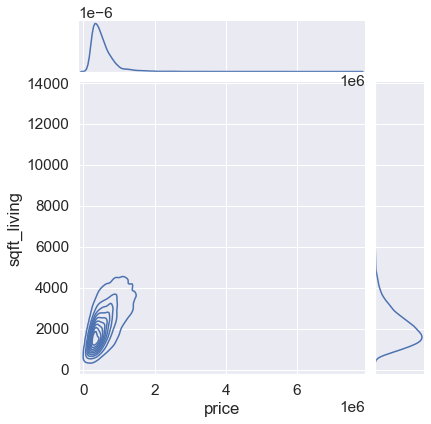

In [169]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='kde');

### Взаимосвязь стоимости недвижимости и кв. метров дома, которые находятся выше земли

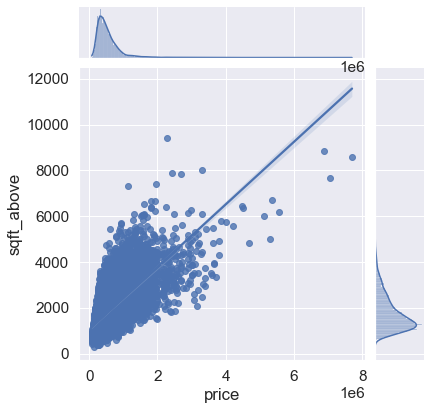

In [102]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

### Взаимосвязь стоимости недвижимости и кач-ва конструкции и дизайна

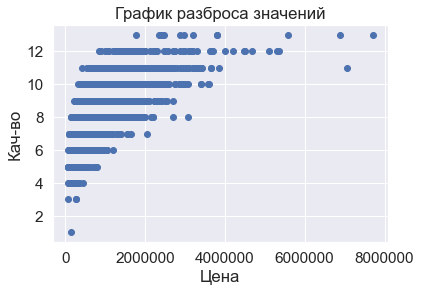

In [154]:
plt.ticklabel_format(style='plain')
plt.scatter(df['price'], df['grade'])

plt.title('График разброса значений')
plt.xlabel('Цена')
plt.ylabel('Кач-во');